In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/ACER/Documents/DSNHack20/DSN_folds.csv")
df.head().T

,0,1,2,3,4
Applicant_ID,Apcnt_1177608,Apcnt_1048432,Apcnt_992524,Apcnt_1181280,Apcnt_1040360
form_field1,3428,3276,3478,3508,3592
form_field2,0,1.06575,0.91305,0.18075,2.89235
form_field3,2.3648,4.5864,0.4798,0.0694,0.067
form_field4,0,0,0,0,0
form_field5,0,37.7982,0,0,0.603
form_field6,3501,0,130315,275412,74688
form_field7,105419,236901,2.3142e+07,6.10613e+06,6.56204e+06
form_field8,105419,16727,130315,408839,1.4218e+06
form_field9,7.58861e+06,212005,1.28401e+07,1.94831e+07,8.82797e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 53 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [4]:
df.select_dtypes(include=['object']).head()

,Applicant_ID,form_field47,default_status
0,Apcnt_1177608,charge,no
1,Apcnt_1048432,charge,no
2,Apcnt_992524,charge,no
3,Apcnt_1181280,charge,yes
4,Apcnt_1040360,charge,no


In [5]:
df["form_field47"].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
form_field1,53471.0,3.491796e+03,1.884624e+02,2990.000000,3.358000e+03,3.484000e+03,3.620000e+03,3.900000e+03
form_field2,52156.0,5.507368e-01,8.209792e-01,0.000000,7.078750e-02,2.675750e-01,7.195125e-01,1.801505e+01
form_field3,55645.0,1.052225e+00,2.147768e+00,0.000000,0.000000e+00,6.200000e-02,1.282000e+00,5.737160e+01
form_field4,55645.0,8.519789e-01,3.157692e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.167220e+01
form_field5,55645.0,1.956317e+00,1.051240e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.077486e+02
form_field6,42640.0,6.244479e+05,1.433422e+06,0.000000,1.400400e+04,1.155330e+05,5.259280e+05,5.313546e+07
form_field7,50837.0,6.865210e+06,1.912729e+07,0.000000,6.869740e+05,2.704328e+06,6.993831e+06,2.158794e+09
form_field8,42640.0,2.626690e+06,3.927355e+06,0.000000,1.929440e+05,9.639420e+05,3.751516e+06,1.037397e+08
form_field9,47992.0,1.316002e+07,1.977963e+07,0.000000,1.368502e+06,5.506295e+06,1.694552e+07,3.200533e+08
form_field10,55645.0,1.185585e+07,2.669459e+07,0.000000,4.500730e+05,3.707559e+06,1.326101e+07,2.191361e+09


In [7]:
def rstr(df,pred = None):
    obs = df.shape[0]
    types = df.dtypes
    counts= df.apply(lambda x:x.count())
    uniques=df.apply(lambda x:[x.unique()])
    nulls=df.apply(lambda x : x.isnull().sum())
    distincts=df.apply(lambda x: x.unique().shape[0])
    missing_percent = df.isnull().sum()/obs * 100
    skewness = df.skew()
    kurtosis=df.kurt()
    print("Data shape:",df.shape)
    if pred is None:
        cols = ["types", "counts","distincts","nulls","missing_percent","uniques","skewness","kurtosis"]
        stp = pd.concat([types,counts,distincts,nulls,missing_percent,uniques,skewness,kurtosis],axis=1,sort=True)
    else :
        corr = df.corr()[pred]
        stp = pd.concat([types,counts,distincts,null,skewness,kurtosis,skewness,kurtosis, corr],axis=1,sort=True)
        corr_col = "corr" + pred
        cols = ["types", "counts","distincts","nulls","missing_percent","uniques","skewness","kurtosis",corr_col]
    stp.columns = cols
    dtypes = stp.types.value_counts()
    print("____________________________\nData types:\n",stp.types.value_counts())
    print("____________________________")
    return stp

In [8]:
rstr(df)

Data shape: (56000, 53)
____________________________
Data types:
 float64    48
object      3
int64       2
Name: types, dtype: int64
____________________________


,types,counts,distincts,nulls,missing_percent,uniques,skewness,kurtosis
Applicant_ID,object,56000,56000,0,0.000000,"[[Apcnt_1177608, Apcnt_1048432, Apcnt_992524, ...",NaN,NaN
default_status,object,56000,2,0,0.000000,"[[no, yes]]",NaN,NaN
form_field1,float64,53471,450,2529,4.516071,"[[3428.0, 3276.0, 3478.0, 3508.0, 3592.0, 3472...",0.120458,-0.613786
form_field10,float64,55645,30943,355,0.633929,"[[372273.0, 236901.0, 24046424.0, 7824735.0, 2...",18.007423,981.240131
form_field11,float64,24579,9509,31421,56.108929,"[[1874980.0, 1079475.0, 195667.0, 1700708.0, n...",9.633062,166.233151
form_field12,float64,46105,16779,9895,17.669643,"[[911816.0, 797839.0, 1026182.0, 876028.0, 403...",4.734462,45.782858
form_field13,float64,50111,21961,5889,10.516071,"[[553547.0, 367994.0, 56405.0, 1953558.0, 8323...",53.667658,4860.848413
form_field14,int64,56000,1237,0,0.000000,"[[42404890, 16576457, 26984930, 96374750, 2814...",118.547478,15527.393317
form_field15,float64,33525,23784,22475,40.133929,"[[119504690.0, 35891863.0, 163383112.0, 105865...",5.533132,76.527472
form_field16,float64,42964,12,13036,23.278571,"[[0.0, 1.0, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0,...",3.999875,24.497313


In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
         # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(df)

Your selected dataframe has 53 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
form_field40,43729,78.1
form_field31,39408,70.4
form_field41,38229,68.3
form_field11,31421,56.1
form_field45,31317,55.9
form_field23,28123,50.2
form_field30,25509,45.6
form_field35,23148,41.3
form_field15,22475,40.1
form_field48,20889,37.3


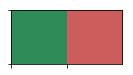

In [11]:
#df.fillna(df.mean(), inplace=True
mypalette = ['seagreen', 'indianred']
sns.set_palette(mypalette)
sns.palplot(sns.color_palette())

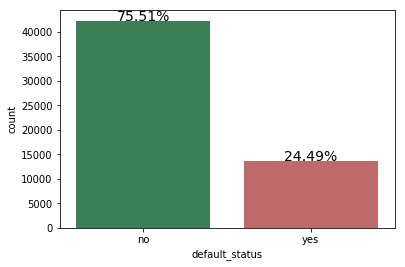

In [12]:
s = sns.countplot(x = 'default_status',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=14) 


In [13]:
print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
528773


In [14]:
df["default_status"].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [17]:
dfr = pd.read_csv("Test.csv")

In [18]:
dfr.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [19]:
df["source"] = "train"
dfr["source"] = "test"
total = pd.concat([df,dfr], ignore_index=True)
print(df.shape,dfr.shape, total.shape)

C:\ProgramDataa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(56000, 54) (24000, 52) (80000, 54)


In [20]:
def sta(x):
    if x=='charge':
        x=1
    else:
        x=0
    return(x)
total.form_field47 = total.form_field47.apply(sta)

In [21]:
def status(x):
    if x=='yes':
        x=1
    else:
        x=0
    return(x)
total.default_status = total.default_status.apply(status)

In [22]:
total["form_field47"].value_counts()

1    51840
0    28160
Name: form_field47, dtype: int64

In [26]:
num_col=total.columns.drop(["default_status","source","kfold","Applicant_ID"])

In [27]:
for c in num_col:
        total[c].fillna(total[c].median(),inplace=True)

In [28]:
from scipy.stats import skew,norm

skew_feat = total[num_col].apply(lambda x: skew(x)).sort_values(ascending = False)

In [29]:
skew_feat

form_field14    105.896380
form_field13     51.215625
form_field24     41.626102
form_field7      33.305702
form_field48     19.821619
form_field50     17.367420
form_field10     15.446177
form_field11     15.320580
form_field39     11.583900
form_field5      10.197922
form_field9       8.502537
form_field4       8.279936
form_field46      8.030243
form_field15      7.903892
form_field45      7.529458
form_field6       7.444464
form_field12      6.148369
form_field34      5.941214
form_field35      5.531585
form_field17      5.284283
form_field18      5.170790
form_field8       4.574858
form_field16      4.547448
form_field2       4.531147
form_field3       4.220257
form_field19      3.276015
form_field20      3.141982
form_field38      2.759624
form_field36      2.684024
form_field49      2.595220
form_field32      2.563827
form_field23      2.531056
form_field37      2.148940
form_field25      1.804606
form_field27      1.674114
form_field43      1.658574
form_field26      1.651590
f

In [30]:
high_skewed = skew_feat[skew_feat>0.5]
skew_index = high_skewed.index
for cols in skew_index:
    total[cols] = np.log1p(total[cols])

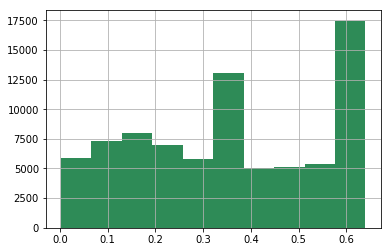

In [31]:
np.square(total["form_field44"]).hist()
plt.show()

In [32]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
total[num_col] = sc.fit_transform(total[num_col])
#df_valid[num_col] = sc.transform(df_valid[num_col])

In [41]:
df = total.loc[total["source"]=="train"]
dfr = total.loc[total["source"]=="test"]
dfr.drop(["source","kfold","default_status"],axis=1,inplace=True)
df.drop(["source"],axis=1,inplace=True)

In [42]:
dfr.head()

,Applicant_ID,form_field1,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,...,form_field46,form_field47,form_field48,form_field49,form_field5,form_field50,form_field6,form_field7,form_field8,form_field9
56000,Apcnt_1000032,-1.383529,-2.445101,0.788589,-1.203162,-2.204723,0.333851,0.498358,-0.360133,-0.383189,...,-0.248036,0.737028,-0.103105,-0.752246,-0.293847,-0.248487,0.586609,-0.352506,-0.091257,-1.093110
56001,Apcnt_1000048,-1.123692,0.651774,-0.045229,0.214025,0.348139,0.219080,0.093153,1.998481,1.773696,...,-0.248036,-1.356801,-0.103105,-0.102961,-0.293847,-0.234901,-2.386861,0.625090,-0.821244,-0.550953
56002,Apcnt_1000052,-0.041037,-2.445101,-1.467224,0.246881,0.371665,0.059500,0.033900,-0.360133,-0.383189,...,-0.248036,0.737028,-0.103105,-0.752246,-0.293847,-0.185565,0.290914,0.225499,0.192677,0.132570
56003,Apcnt_1000076,-1.405182,-0.017366,0.642607,0.251163,0.323803,-0.038971,0.033900,3.378181,3.035393,...,-0.248036,0.737028,-0.573459,0.171468,-0.293847,-0.210550,-2.386861,-0.314148,-0.049066,-0.480890
56004,Apcnt_1000080,-0.138476,0.437391,-0.757016,0.074758,0.570127,0.333851,-0.197209,-0.360133,-0.383189,...,-0.248036,-1.356801,0.429048,0.788340,-0.293847,-0.188023,-0.113800,-0.039586,0.252942,0.319878


In [43]:
from sklearn import linear_model
from sklearn import metrics
for fold in range(5):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold ==fold].reset_index(drop = True)
    x_train = df_train.drop(["default_status","Applicant_ID","kfold"],axis=1).values
    #x_train = ohe.transform(df_train[features])
    y_train = df_train.default_status.values
    x_valid = df_valid.drop(["default_status","Applicant_ID","kfold"],axis=1).values
    #x_valid = ohe.transform(df_valid[features])
    y_valid = df_valid.default_status.values
    rft = linear_model.LogisticRegression(C=0.001, random_state=5, class_weight='balanced')
    rft.fit(x_train, y_train)
    preds = rft.predict(x_valid)
    #man = []
    result = metrics.roc_auc_score(y_valid, preds)
    print(f"Fold={fold}, result = {result}")
    #joblib.dump(rft,f'C:/Users/ACER/Documents/DSNHack/dt_{fold}.bin')

Fold=0, result = 0.7448243351205478
Fold=1, result = 0.7500021015149401
Fold=2, result = 0.7470065051263387
Fold=3, result = 0.7436911767108518
Fold=4, result = 0.7502094078810303


In [44]:
sub = pd.read_csv("C:/Users/ACER/Documents/DSNHack20/SampleSubmission.csv")
sub["default_status"].value_counts()

1    24000
Name: default_status, dtype: int64

In [45]:
if __name__ == "__main__":
    dat = dfr
    dfr = dfr.drop(["Applicant_ID"],axis=1)
    predicts = rft.predict_proba(dfr)[:,1]
    sub["default_status"] = predicts
    #submission = pd.DataFrame({"Applicant_ID":dat["Applicant_ID"], "default_status": predicts})
    sub.to_csv("dsn_rft.csv",index = False)

In [46]:
s = pd.read_csv("dsn_rft.csv")
s.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.699553
1,Apcnt_1000048,0.773896
2,Apcnt_1000052,0.479185
3,Apcnt_1000076,0.901253
4,Apcnt_1000080,0.393276
